In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X = pd.read_csv("C:/Users/sergi/modalidad/Dataset/X.csv")
y = X['DIA']
X = X.drop('DIA',axis = 1)

In [4]:
X.columns

Index(['X', 'Y', 'OBJECTID', 'RADICADO', 'DIA_NUMERO', 'PERIODO', 'CBML',
       'MES', 'NUM_COMUNA'],
      dtype='object')

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X,y, random_state=1)

In [6]:
X_train.head()

,X,Y,OBJECTID,RADICADO,DIA_NUMERO,PERIODO,CBML,MES,NUM_COMUNA
4324,-75.579996,6.285553,716504.0,1656413.0,4.0,2019.0,514.0,1.0,5.0
18719,-75.566349,6.269555,731267.0,1687365.0,2.0,2019.0,417.0,9.0,4.0
8669,-75.572973,6.256310,721171.0,1671026.0,4.0,2019.0,1006.0,5.0,10.0
2316,-75.567062,6.291756,714302.0,1656232.0,3.0,2019.0,510.0,1.0,5.0
940,-75.558637,6.263287,712817.0,1675732.0,6.0,2019.0,409.0,6.0,4.0


In [7]:
X_train.head()

,X,Y,OBJECTID,RADICADO,DIA_NUMERO,PERIODO,CBML,MES,NUM_COMUNA
4324,-75.579996,6.285553,716504.0,1656413.0,4.0,2019.0,514.0,1.0,5.0
18719,-75.566349,6.269555,731267.0,1687365.0,2.0,2019.0,417.0,9.0,4.0
8669,-75.572973,6.256310,721171.0,1671026.0,4.0,2019.0,1006.0,5.0,10.0
2316,-75.567062,6.291756,714302.0,1656232.0,3.0,2019.0,510.0,1.0,5.0
940,-75.558637,6.263287,712817.0,1675732.0,6.0,2019.0,409.0,6.0,4.0


# Cross Validation

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

scores = cross_val_score(Lasso(),X,y, cv=5, scoring='r2')
scores

array([0.69820346, 0.70057871, 0.69131256, 0.70162256, 0.7225998 ])

In [9]:
scores.mean()

0.7028634183641895

In [10]:
Lasso().fit(X_train,y_train).score(X_test,y_test)

0.707926679815436

# Seleccion de modelos

In [11]:
!pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\sergi\anaconda3\envs\machine-learning\lib\site-packages (0.22.2.post1)


In [12]:
from sklearn.model_selection import cross_validate

results = cross_validate(Lasso(),X,y,return_train_score=True, cv=5)
results

{'fit_time': array([0.17001367, 0.18101501, 0.17001367, 0.16401386, 0.15201116]),
 'score_time': array([0.00199795, 0.00200057, 0.00099945, 0.0009985 , 0.00199986]),
 'test_score': array([0.69820346, 0.70057871, 0.69131256, 0.70162256, 0.7225998 ]),
 'train_score': array([0.70659448, 0.70541018, 0.70857781, 0.72149161, 0.71850024])}

In [13]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.7121148641300117
0.7028634183641895


El score de 0.71 no es malo, pero tampoco es muy bueno.
nuestro modelo no esta encajando tambien a los datos

# Validation Curves y Learning Curves

Vecino mas cercano

In [14]:
from sklearn.neighbors import KNeighborsRegressor

cross_validate(KNeighborsRegressor(),X,y,cv=5)

{'fit_time': array([0.08451009, 0.08700562, 0.09400725, 0.09200573, 0.09500623]),
 'score_time': array([0.11500859, 0.12401938, 0.12601781, 0.12700915, 0.12401056]),
 'test_score': array([0.67143349, 0.62748271, 0.41362742, 0.71202378, 0.75905147])}

In [15]:
cross_validate(KNeighborsRegressor(n_neighbors=10),X,y,cv=5)

{'fit_time': array([0.0870049 , 0.09000397, 0.09400845, 0.09300685, 0.08700538]),
 'score_time': array([0.143013  , 0.15201139, 0.1520102 , 0.13501072, 0.13901138]),
 'test_score': array([0.63940318, 0.62169246, 0.42528498, 0.70755358, 0.75422049])}

In [16]:
n = np.arange(2,50,2)
n

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])

In [17]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(KNeighborsRegressor(),
                                            X,
                                            y,
                                            param_name='n_neighbors',
                                            param_range=n,
                                            cv=5)

In [18]:
np.mean(train_scores, axis=1)

array([0.92322258, 0.87952667, 0.85625601, 0.84289334, 0.83277421,
       0.8237046 , 0.81559715, 0.80896328, 0.80289473, 0.79721837,
       0.79231754, 0.7873562 , 0.78275338, 0.77744659, 0.77288736,
       0.76892086, 0.76474613, 0.76080429, 0.7569838 , 0.7530532 ,
       0.74924327, 0.74515293, 0.74127155, 0.73761754])

([<matplotlib.axis.XTick at 0x1ae8f43a760>,
 <a list of 24 Text xticklabel objects>)

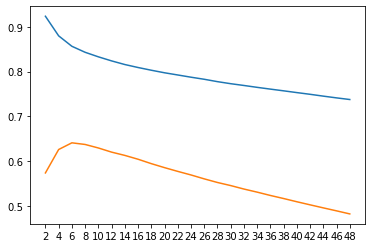

In [19]:
plt.plot(np.mean(train_scores, axis=1))
plt.plot(np.mean(test_scores, axis=1))
plt.xticks(np.arange(24),n)

El mejor parametro que se puede elijir es 7 vecinos

# Curva de aprendizaje

In [20]:
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsRegressor(n_neighbors=7),X,y, cv=5)

samples, train, test = lc[0],lc[1],lc[2] 

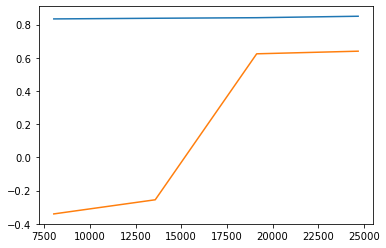

In [21]:
plt.plot(samples[1:],np.mean(train,axis=1)[1:])
plt.plot(samples[1:],np.mean(test,axis=1)[1:])


El modelo KNeighbors esta aprendiendo va creciendo pero a un no a terminado de aprender

para que termine de aprender debemos agregarle mas datos

Aprender: Cuando mejora el score en función de la cantidad de datos